In [9]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import sentiment_mod as s
import json

10662


In [10]:
#consumer key, consumer secret, access token, access secret.
from twitterkeys import *

In [39]:
class listener(StreamListener):
    def on_data(self, data):
        all_data = json.loads(data)

        tweet = all_data["text"]
        sentiment_value, confidence = s.sentiment(tweet)
        # print(tweet)
        print(tweet, sentiment_value, confidence)
        
        if confidence*100 >= 80:
            output = open("twitter-out.txt", "a")
            output.write(tweet)
            output.write('\n')
            output.close()
            
            output = open("twitter-out-sentiment.txt","a")
            output.write(sentiment_value)
            output.write('\n')
            output.close()
            
        return True

    def on_error(self, status):
        print (status)

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["covid"], languages=["en"])

RT @omar_quraishi: Scientists gave Russia's Sputnik V vaccine the green light on Tuesday saying it was almost 92% effective in fighting COV… neg 1.0
RT @PedzisaiRuhanya: ZANU PF updates on COVID-19 are pathetic. Its about police statistics on arrests and nothing scientific and vaccine ro… neg 1.0
RT @Femi_Sorry: When Matt Hancock says all countries pursuing a Zero-Covid strategy failed to control the spread. https://t.co/xfV2AGkZms neg 1.0
RT @CTVVancouver: Artists and presenters can apply for grants worth $5,000, which come from Music BC and Creative BC through the provincial… pos 1.0
RT @BNODesk: NEW: 20% of Israel's population fully vaccinated against COVID-19, up from 15% last week neg 1.0
RT @kylegriffin1: The federal government will start shipping COVID vaccines to retail pharmacies next week.
https://t.co/AyRsfKAmzz neg 1.0
RT @zt000tz: PPUM is on Lazada, asking for COVID-19 donations for the hospital equipments. Chip in start from RM50 to RM500 thru Lazada app… neg 0.8
RT @errj

RT @TheSun: Isle of Man locals flock to pubs and shops as all Covid lockdown rules are lifted including social distancing and masks https:/… neg 1.0
RT @WHCOS: This IS a bipartisan agenda. neg 0.8
RT @kylegriffin1: The federal government will start shipping COVID vaccines to retail pharmacies next week.
https://t.co/AyRsfKAmzz neg 1.0
RT @JoubertBotha: Anyone knows a friend in HR that lost his/her job due to Covid-19? Pls send them my way, I'm hiring. neg 1.0
RT @ABetterBalance: More than 325,000 New York children have been pushed into poverty, or near poverty due to COVID-19’s economic downturn.… pos 0.8
@calalouf @ChiThukral @karentkang Probably Notion? I've been using it for work, love the kanban board, couldn't get… https://t.co/oFWxFtb2LW pos 1.0
@justamelonn There is truth in your statement regarding the penis.

Covid virus travels thru your body by way of bl… https://t.co/5Tr3Pl53B2 pos 1.0
RT @levinepmc: Finally. What we have all been waiting for. Harper's fault that we can't m

Lots of compelling stuff. Covid getting tricky. One day at a time. pos 1.0
RT @tom71266902: And this is why Sturgeon and her cronies should be chucked out on their ears , we need people getting the vaccines into ar… neg 1.0
News Update: FCTA to embark on rigorous enforcement of COVID-19 health and safety protocols https://t.co/dk2vxYZ1Xq pos 1.0
That’s another ding ding ding! for @SarahTaber_bww and wingnuts at a farmer’s market. pos 0.8
RT @wendizzle__: life pre covid was so unsanitary if you actually think about it. neg 0.8
RT @latimeralder: Observation:

South Africa, home of the 'South African variant' has had 744 Covid deaths per million people. 

UK has had… neg 0.8
RT @EmekaNwaGuy: Available for 25k... Pls Retweet 

Chelsea #WOLARS Nicki Minaj neg 0.8
RT @runnermandoc: One month into the care home vaccination programme, I am deeply concerned to be seeing covid-19 infection outbreaks among… pos 1.0
RT @MarkSimoneNY: Hysterical. The slanted, left wing 'fact checking' site PolitiFa

KeyboardInterrupt: 

# Plot tweet sentiment

In [24]:
import matplotlib.pyplot as plt

# Data sentiment output ('pos' or 'neg') from tweetStream
pullData = open("twitter-out-sentiment-trump.txt","r").read()
lines = pullData.split('\n')

posCount = 0
negCount = 0
xar = []
yar = []
x = 0
y = 0

for l in lines:
    x += 1
    if "pos" in l:
        posCount += 1
        y += 1
    elif "neg" in l:
        negCount += 1
        y -= 1
    
    xar.append(x)
    yar.append(y)

<BarContainer object of 2 artists>

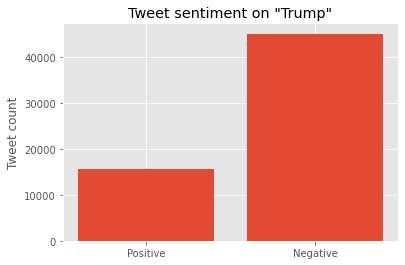

In [22]:
plt.ylabel('Tweet count')
plt.title('Tweet sentiment on "Trump"')
plt.bar(['Positive', 'Negative'], [posCount, negCount])

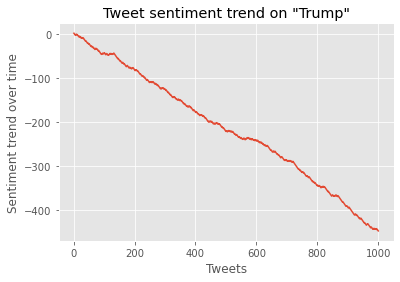

In [32]:
plt.title('Tweet sentiment trend on "Trump"')
plt.xlabel('Tweets')
plt.ylabel('Sentiment trend over time')
plt.plot(xar[0:1000],yar[0:1000])